# **Santander-Customer-Transaction-Prediction**
# **Background**:
At Santander, mission is to help people and businesses prosper. We are always looking for ways to help our customers understand their financial health and identify which products and services might help them achieve their monetary goals. Our data science team is continually challenging our machine learning algorithms, working with the global data science community to make sure we can more accurately identify new ways to solve our most common challenge, binary classification problems such as:

**is a customer satisfied?**


**Will a customer buy this product?**

**Can a customer pay this loan?**

# **Problem Statement:**
We need to identify which customers will make a specific transaction in the future, irrespective of the amount of money transacted.

Supervised: The labels are included in the training data and the goal is to train a model to learn to predict the labels from the features
Classification: The label is a binary variable, 0 (will not make a specific transaction in the future), 1 (will make a specific transaction in the future)

# **Importing libraries**

In [0]:
# data visualisation and manipulation
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import style
from scipy import stats
import seaborn as sns
import missingno as msno
import pandas_profiling as pp
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
% matplotlib inline  
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
#classification.
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#evaluation metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification
from sklearn.metrics import classification_report,roc_auc_score,roc_curve, auc,confusion_matrix


# **Data Collection**

In [36]:
#uncomment below section if deploying this project from Google Colab
#train=pd.read_csv('train.csv')
#test=pd.read_csv('test.csv')


#in this directory i have kept the train.csv and test.csv
os.chidr("C:\users\Rajat\DataScienceProject\")
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
print(os.getcwd())

Profile_report=pp.ProfileReport(train.iloc[:,2:4])
# view profile report generated in the saved repository as a html file
Profile_report.to_file("profile_dataset.html")
print(test.shape)
print(train.shape)
test.head(5)
test.info()

(200000, 201)
(200000, 202)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB


####  train contains:

- ID_code (string)
- target
- 200 numerical variables, named from var_0 to var_199

In [0]:
print(test.shape)
print(test.head(5))

test.info()

(200000, 201)
  ID_code    var_0    var_1    var_2  ...  var_196  var_197  var_198  var_199
0  test_0  11.0656   7.7798  12.9536  ...   4.3654  10.7200  15.4722  -8.7197
1  test_1   8.5304   1.2543  11.3047  ...  -1.4852   9.8714  19.1293 -20.9760
2  test_2   5.4827 -10.3581  10.1407  ...  -7.1086   7.0618  19.8956 -23.1794
3  test_3   8.5374  -1.3222  12.0220  ...   3.9567   9.2295  13.0168  -4.2108
4  test_4  11.7058  -0.1327  14.1295  ...  -5.1612   7.2882  13.9260  -9.1846

[5 rows x 201 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB


####  test contains:

- ID_code (string)
- 200 numerical variables, named from var_0 to var_199

# **Data Visualizaton**

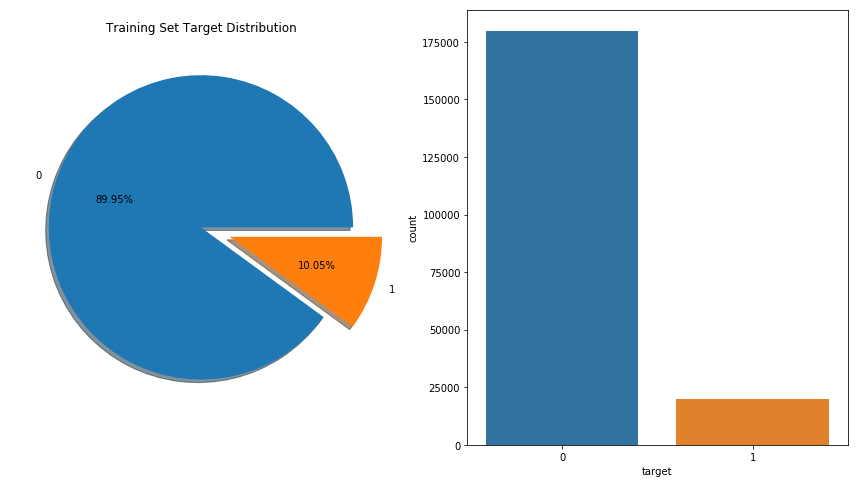

In [0]:
f,ax=plt.subplots(1,2,figsize=(15,8))

train['target'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.2f%%',ax=ax[0],shadow=True)
ax[0].set_title('Training Set Target Distribution')
ax[0].set_ylabel('')
sns.countplot('target',data=train,ax=ax[1])
plt.show()
# The data is unbalanced with respect to target value

In [0]:
# KDE(Kernal Density Estimate) plots of features with respect to target value 0 and 1 for all variables ie. var_0 to var_199

def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(10,5,figsize=(18,24))

    for feature in features:
        i += 1
        plt.subplot(10,5,i)
        sns.distplot(df1[feature], hist=False,label=label1,kde_kws = {'shade': True, 'linewidth': 2})
        sns.distplot(df2[feature], hist=False,label=label2,kde_kws = {'shade': True, 'linewidth': 2})
        plt.xlabel(feature, fontsize=11)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', labelsize=6, pad=-6)
        plt.tick_params(axis='y', labelsize=6)
    plt.show()

<Figure size 432x288 with 0 Axes>

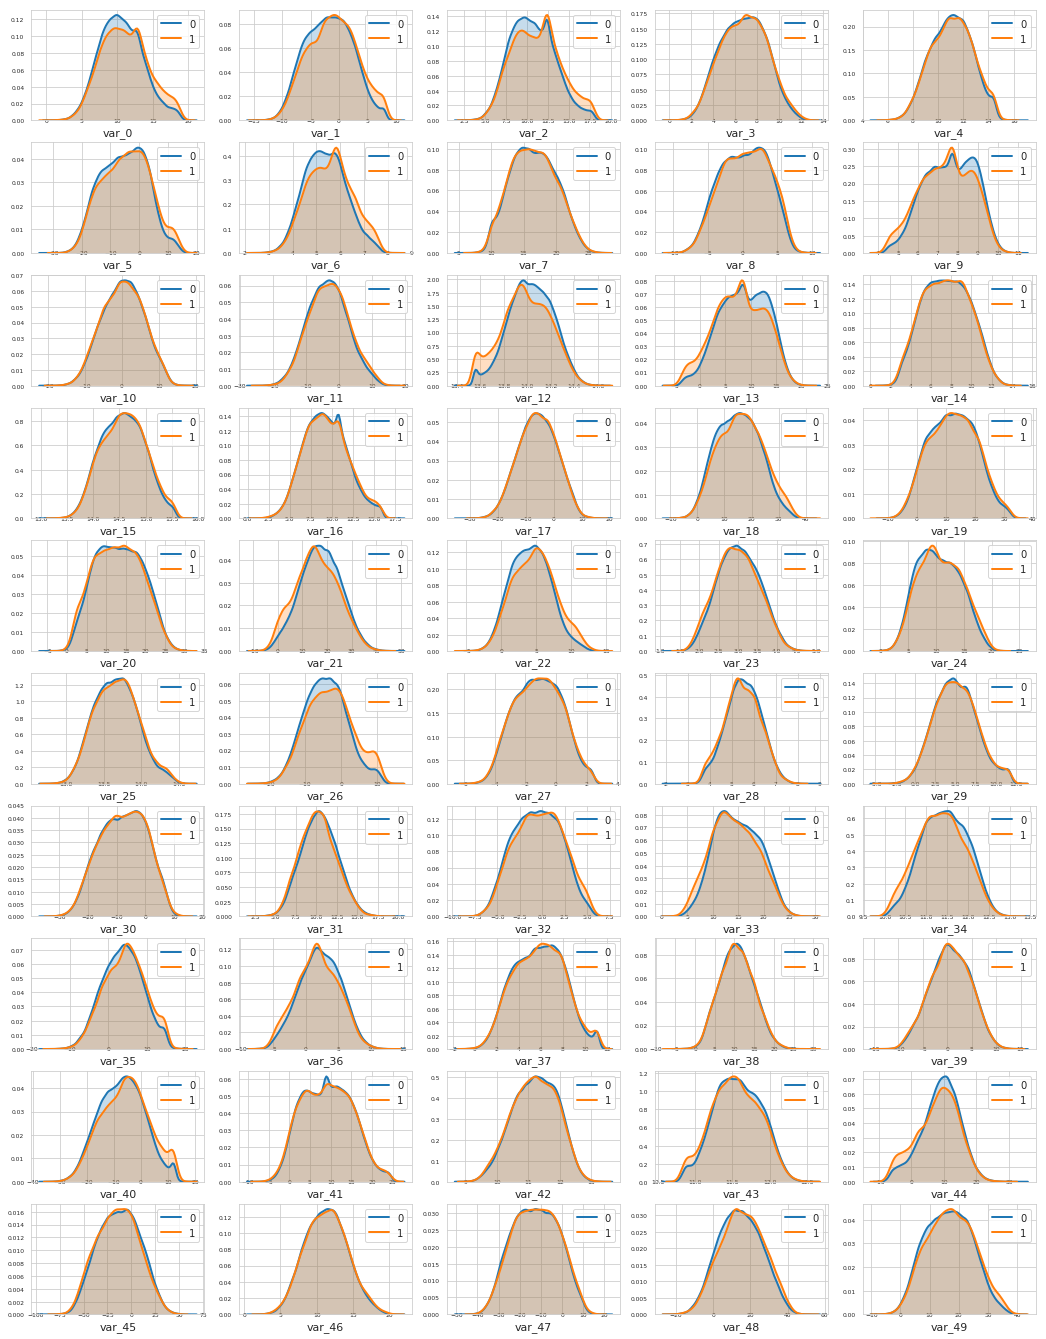

In [0]:
t0 = train.loc[train['target'] == 0]
t1 = train.loc[train['target'] == 1]
features = train.columns.values[2:52]
plot_feature_distribution(t0, t1, '0', '1', features)
#From var_0 to var_49

<Figure size 432x288 with 0 Axes>

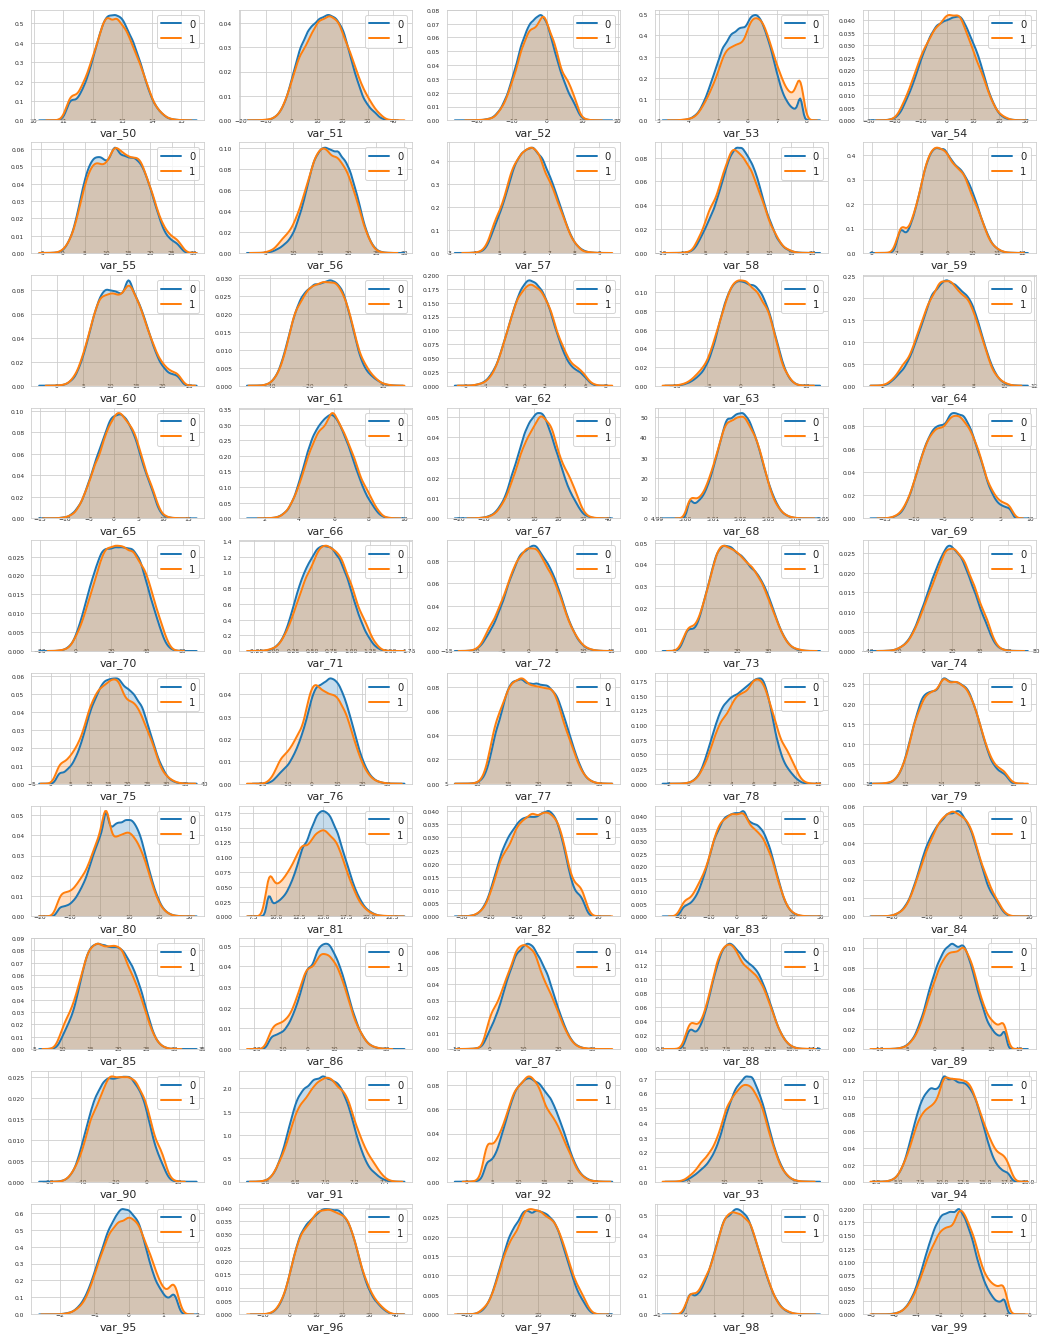

In [0]:
features = train.columns.values[52:102]
plot_feature_distribution(t0, t1, '0', '1', features)
#From var_50 to var_99

<Figure size 432x288 with 0 Axes>

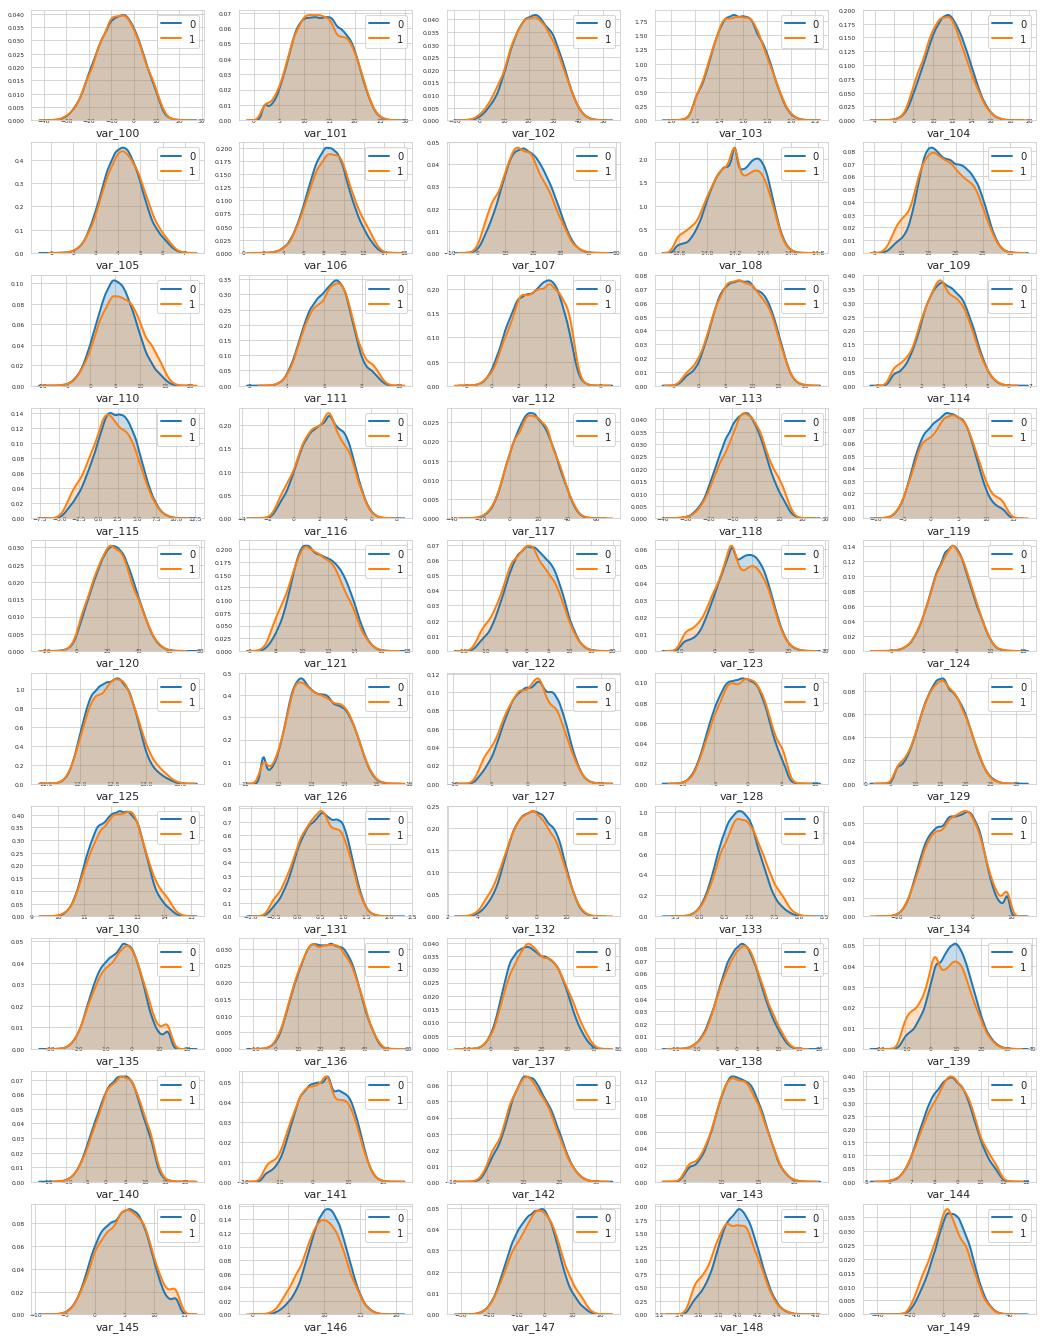

In [0]:
features = train.columns.values[102:152]
plot_feature_distribution(t0, t1, '0', '1', features)
#From var_100 to var_149

<Figure size 432x288 with 0 Axes>

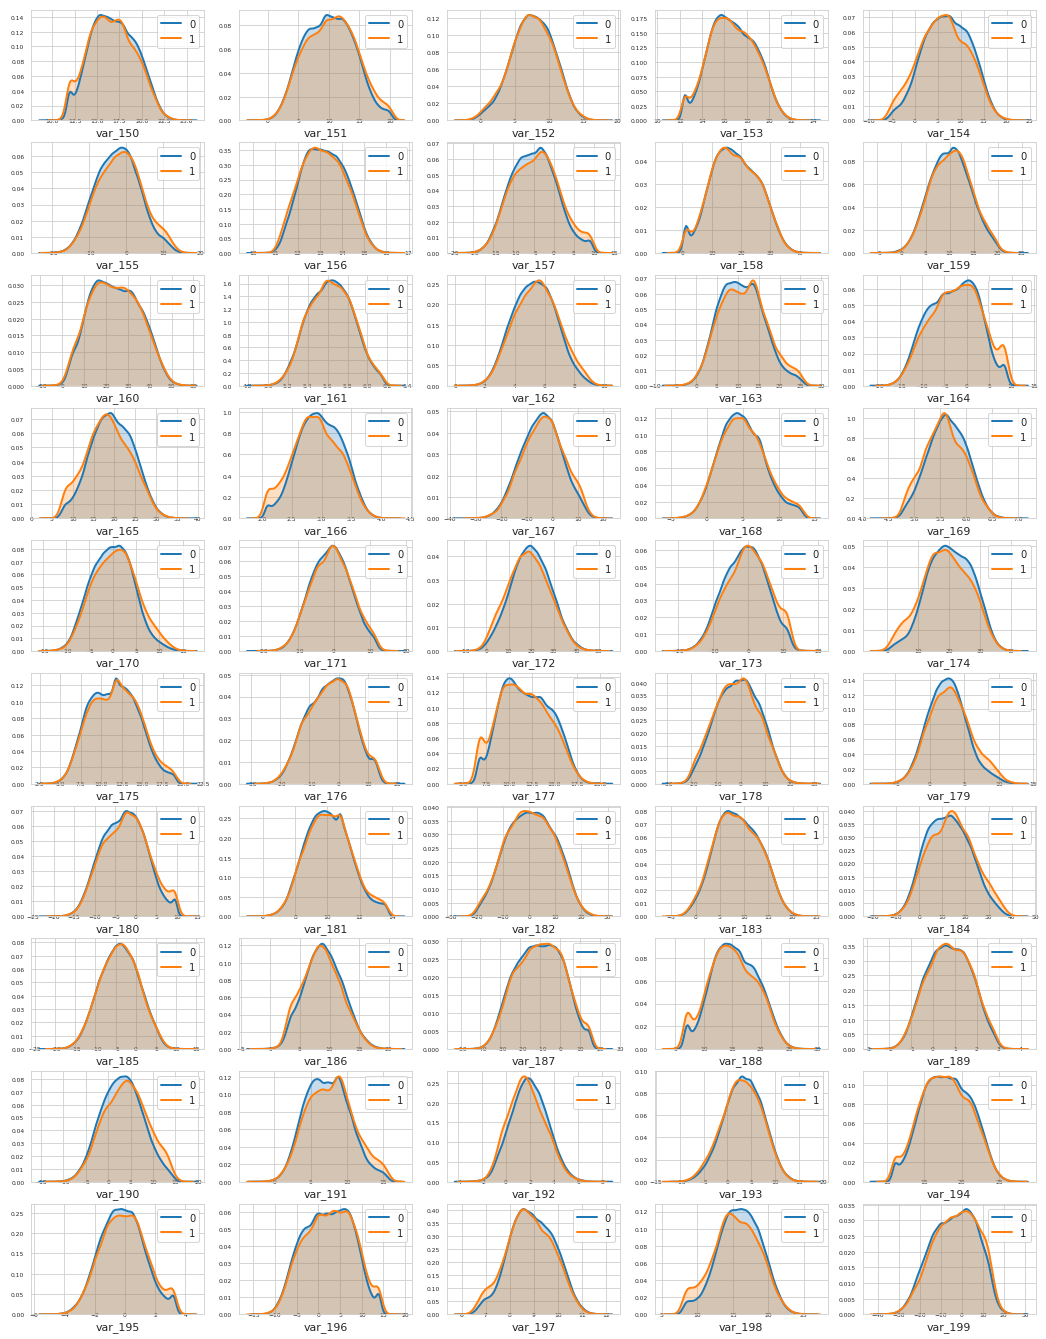

In [0]:
features = train.columns.values[152:202]
plot_feature_distribution(t0, t1, '0', '1', features)
#From var_150 to var_199

#### inference from the KDE plots above

- if we look closely var_2, var_9, var_12, var_13, var_26, var_40, var_53, var_81 and many others have resemblance of a dimodal type distribution (having two peaks).
- All of these variables have a bump of frequency that matches the rising of the probability of making a transaction.
- if pdf(target = 1) - pdf(target = 0) > 0, then there is a high probability of the client making a transfer.

# **Missing Value Analysis**

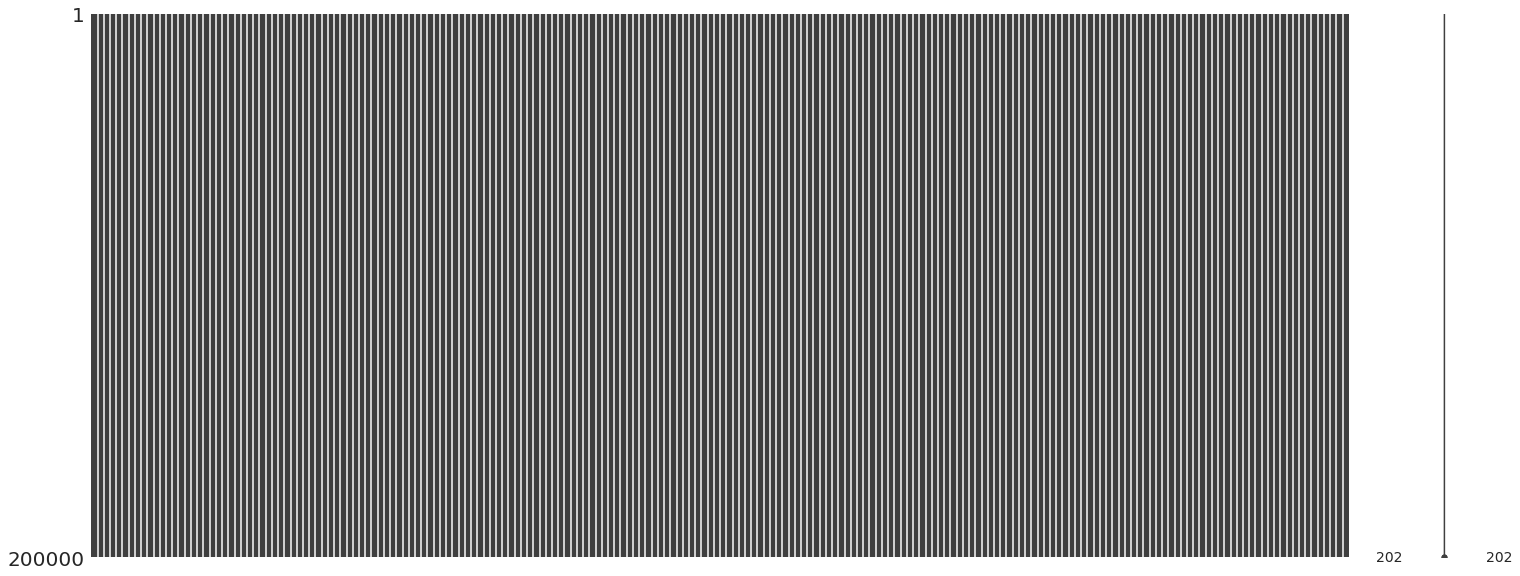

In [0]:
import missingno as msno
%matplotlib inline
msno.matrix(train)
#msno.bar(train)
#msno.heatmap(train)

In [0]:
# Missing Value Analysis
obs = train.isnull().sum().sort_values(ascending = False)
percent = round(train.isnull().sum().sort_values(ascending = False)/len(train)*100, 2)
pd.concat([obs, percent], axis = 1,keys= ['Number of Observations', 'Percent'])

# No missing values were found

,Number of Observations,Percent
var_199,0,0.0
var_61,0,0.0
var_71,0,0.0
var_70,0,0.0
var_69,0,0.0
var_68,0,0.0
var_67,0,0.0
var_66,0,0.0
var_65,0,0.0
var_64,0,0.0


In [0]:
for col in train.columns[2:]:
    print("Number of unique values of {} : {}".format(col, train[col].nunique()))
    
#Most features have more than thousands of values for each variable except var_68 ie. (451)

Number of unique values of var_0 : 94672
Number of unique values of var_1 : 108932
Number of unique values of var_2 : 86555
Number of unique values of var_3 : 74597
Number of unique values of var_4 : 63515
Number of unique values of var_5 : 141029
Number of unique values of var_6 : 38599
Number of unique values of var_7 : 103063
Number of unique values of var_8 : 98617
Number of unique values of var_9 : 49417
Number of unique values of var_10 : 128764
Number of unique values of var_11 : 130193
Number of unique values of var_12 : 9561
Number of unique values of var_13 : 115181
Number of unique values of var_14 : 79122
Number of unique values of var_15 : 19810
Number of unique values of var_16 : 86918
Number of unique values of var_17 : 137823
Number of unique values of var_18 : 139515
Number of unique values of var_19 : 144180
Number of unique values of var_20 : 127764
Number of unique values of var_21 : 140062
Number of unique values of var_22 : 90660
Number of unique values of var_23 

In [0]:
train['var_68'].value_counts()

5.0214    1084
5.0215    1081
5.0209    1080
5.0183    1077
5.0179    1071
5.0208    1070
5.0193    1070
5.0202    1069
5.0174    1066
5.0203    1063
5.0189    1063
5.0195    1062
5.0220    1060
5.0204    1059
5.0211    1058
5.0188    1057
5.0157    1054
5.0158    1049
5.0219    1049
5.0190    1048
5.0201    1047
5.0221    1043
5.0207    1040
5.0192    1038
5.0212    1038
5.0184    1035
5.0205    1033
5.0151    1031
5.0185    1029
5.0197    1029
          ... 
4.9976       1
5.0415       1
5.0458       1
4.9951       1
5.0445       1
4.9995       1
5.0444       1
5.0000       1
5.0426       1
5.0421       1
4.9984       1
5.0419       1
5.0422       1
4.9964       1
5.0436       1
4.9979       1
4.9993       1
4.9977       1
5.0414       1
5.0418       1
5.0410       1
5.0412       1
4.9978       1
5.0469       1
4.9967       1
5.0407       1
5.0411       1
4.9938       1
4.9989       1
5.0431       1
Name: var_68, Length: 451, dtype: int64

### **Checking Duplicate Values in a variable**

In [0]:
features = train.columns.values[2:202]
unique_max_train = []
for feature in features:
    values = train[feature].value_counts()
    unique_max_train.append([feature, values.max(), values.idxmax()])

In [0]:
np.transpose((pd.DataFrame(unique_max_train, columns=['Feature', 'Max duplicates', 'Value'])).
            sort_values(by = 'Max duplicates', ascending=False).head(15))

,68,108,126,12,91,103,148,71,161,25,125,169,166,133,43
Feature,var_68,var_108,var_126,var_12,var_91,var_103,var_148,var_71,var_161,var_25,var_125,var_169,var_166,var_133,var_43
Max duplicates,1084,313,305,203,66,61,59,54,52,41,40,39,39,39,39
Value,5.0214,14.1999,11.5356,13.5545,6.9785,1.6662,4.0456,0.7031,5.7688,13.6723,12.5159,5.6941,2.7306,6.8632,11.4522


**Inference from Dulicate value Analysis**

*   var_68, var_108,var_126 and var_12 were the top 4 features with max duplicate values


# **Correlation Analysis**

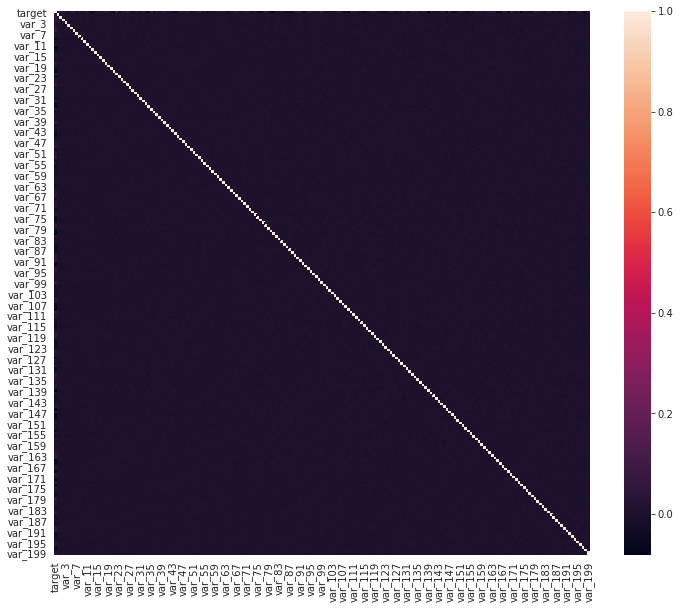

In [0]:
train_corr = train.corr()
plt.figure(figsize=(12,10))
sns.heatmap(train_corr)

From the above heatmap all the variables are not correlated and hence are independent.

**Checking correlation wih Target variable**

In [0]:
corr = train.corr()
abs(corr['target']).sort_values(ascending=False).head(30)

target     1.000000
var_81     0.080917
var_139    0.074080
var_12     0.069489
var_6      0.066731
var_110    0.064275
var_146    0.063644
var_53     0.063399
var_26     0.062422
var_76     0.061917
var_174    0.061669
var_22     0.060558
var_21     0.058483
var_99     0.058367
var_166    0.057773
var_80     0.057609
var_190    0.055973
var_2      0.055870
var_165    0.055734
var_13     0.055156
var_148    0.055011
var_133    0.054548
var_198    0.053000
var_34     0.052692
var_0      0.052390
var_1      0.050343
var_115    0.050174
var_179    0.050002
var_109    0.049926
var_40     0.049530
Name: target, dtype: float64

# **Outlier Analysis**

In [0]:
def plot_feature_boxplot(df, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(10,5,figsize=(18,24))

    for feature in features:
        i += 1
        plt.subplot(10,5,i)
        sns.boxplot(df[feature]) 
        plt.xlabel(feature, fontsize=11)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', labelsize=6, pad=-6)
        plt.tick_params(axis='y', labelsize=6)
    plt.show()

<Figure size 432x288 with 0 Axes>

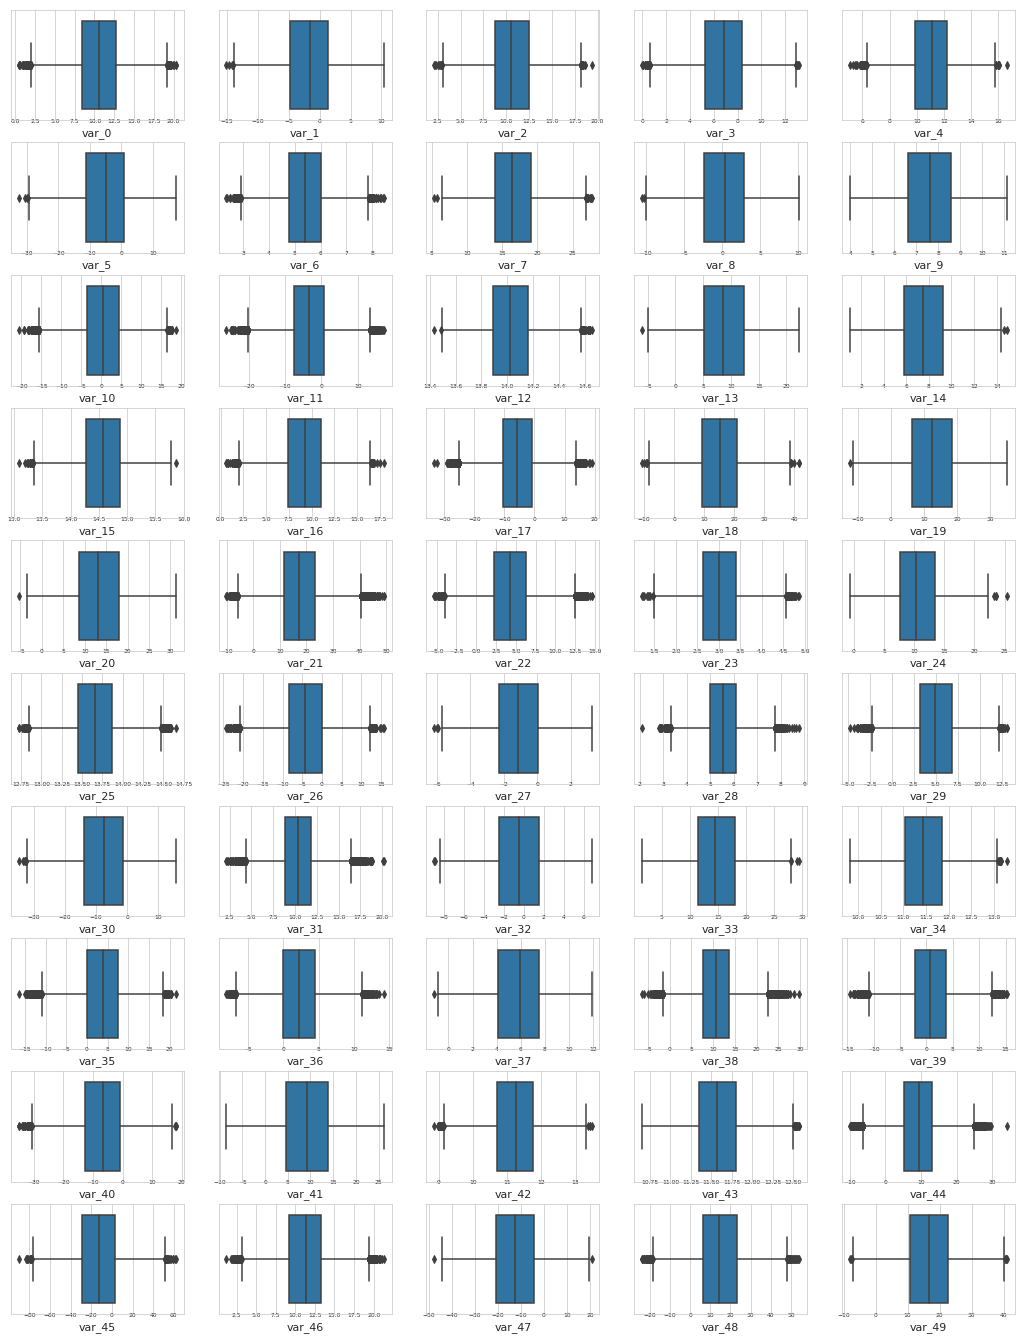

In [0]:
features = train.columns.values[2:52]
plot_feature_boxplot(train, features)
#From var_0 to var_49

<Figure size 432x288 with 0 Axes>

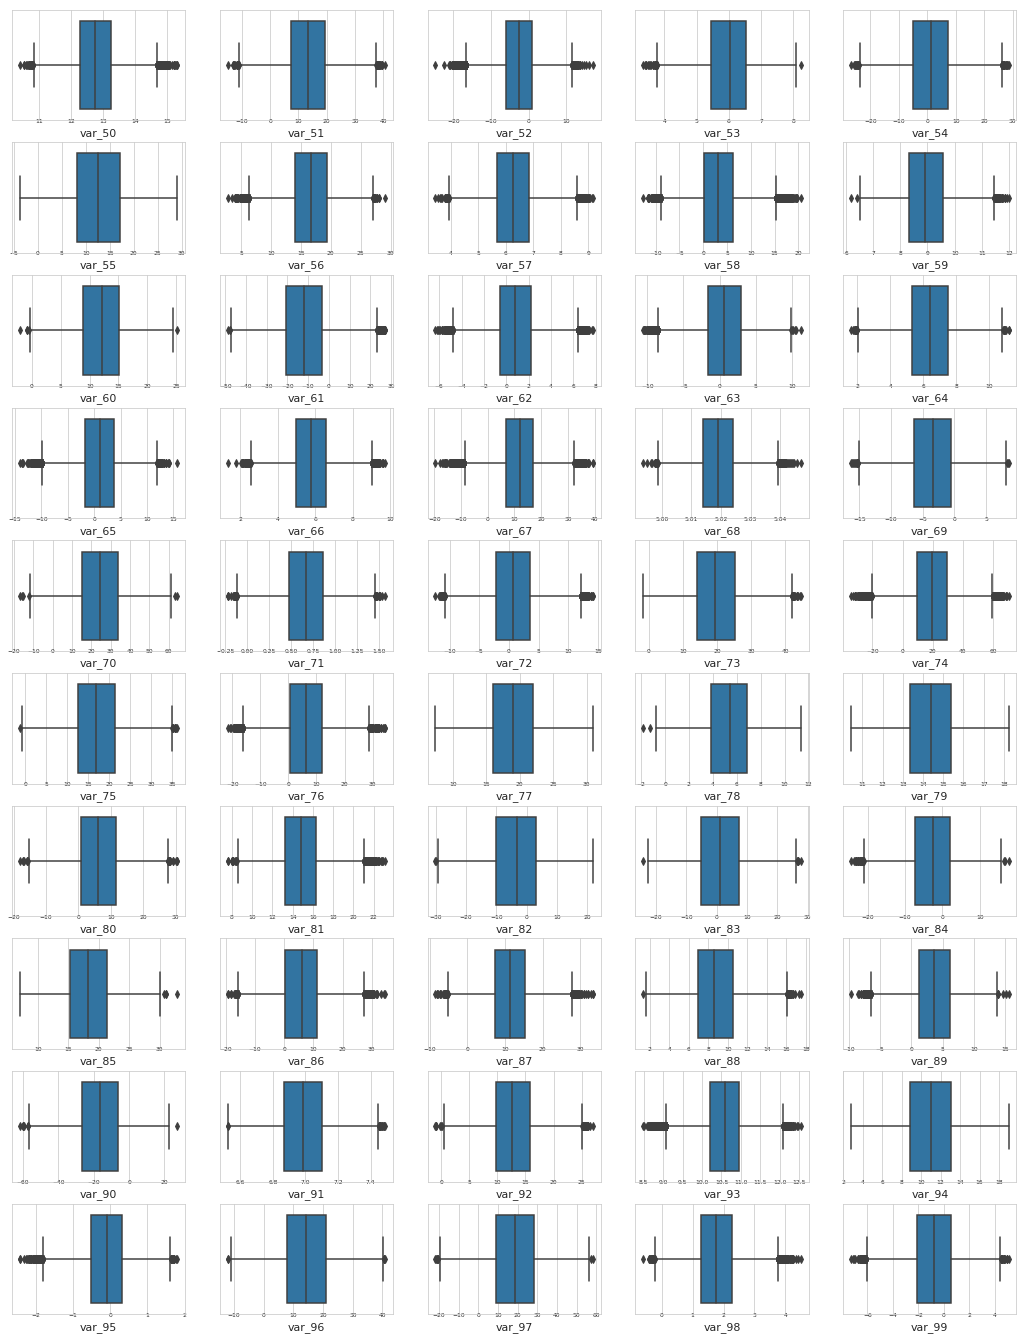

In [0]:
features = train.columns.values[52:102]
plot_feature_boxplot(train, features)
#From var_50 to var_99

<Figure size 432x288 with 0 Axes>

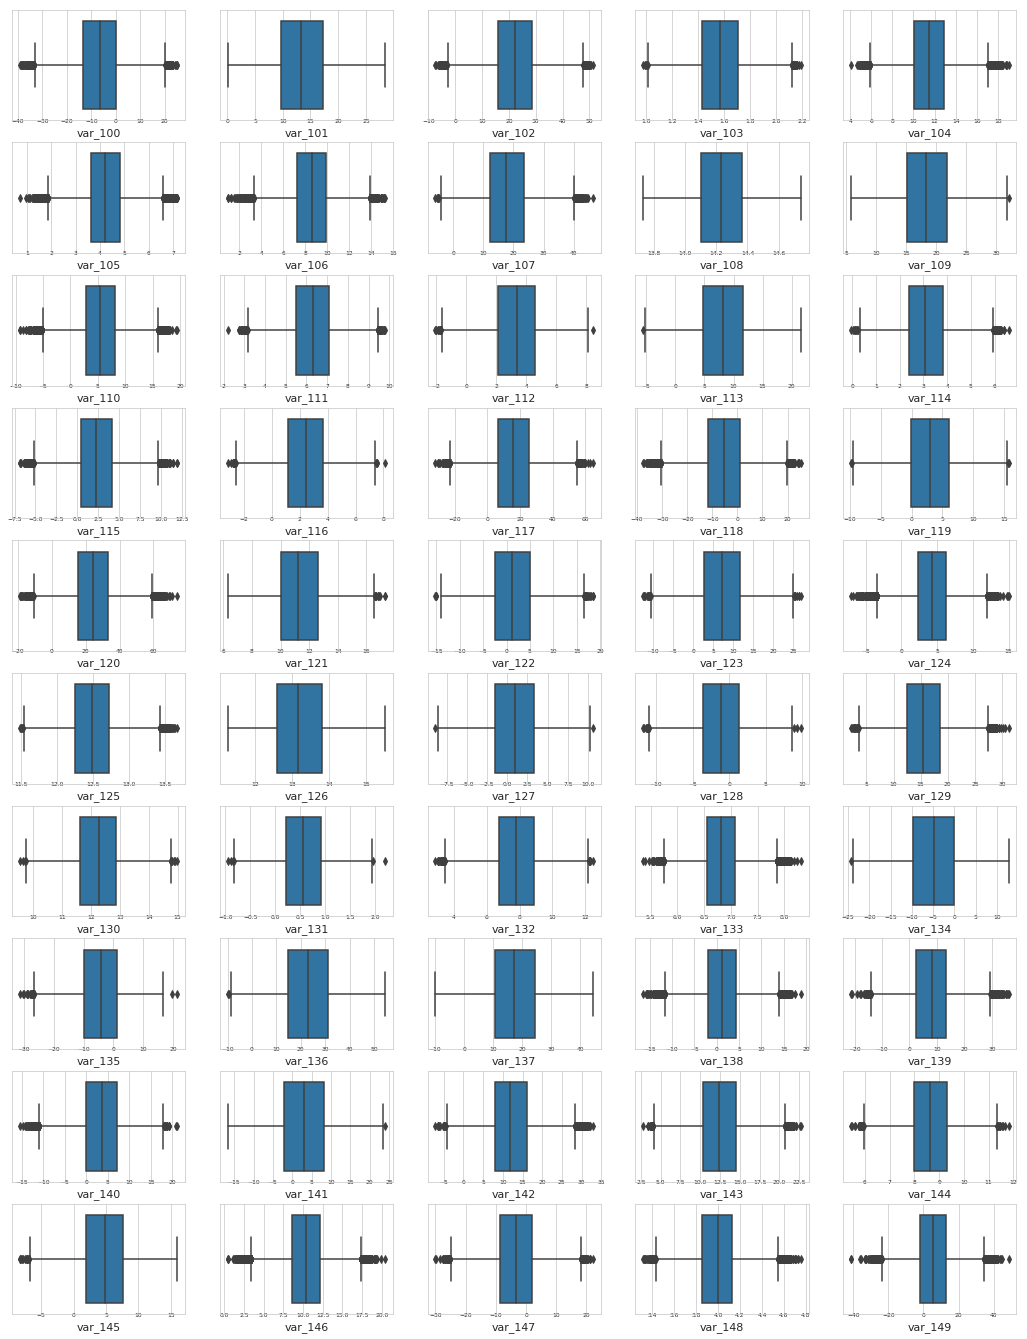

In [0]:
features = train.columns.values[102:152]
plot_feature_boxplot(train, features)
#From var_100 to var_149

<Figure size 432x288 with 0 Axes>

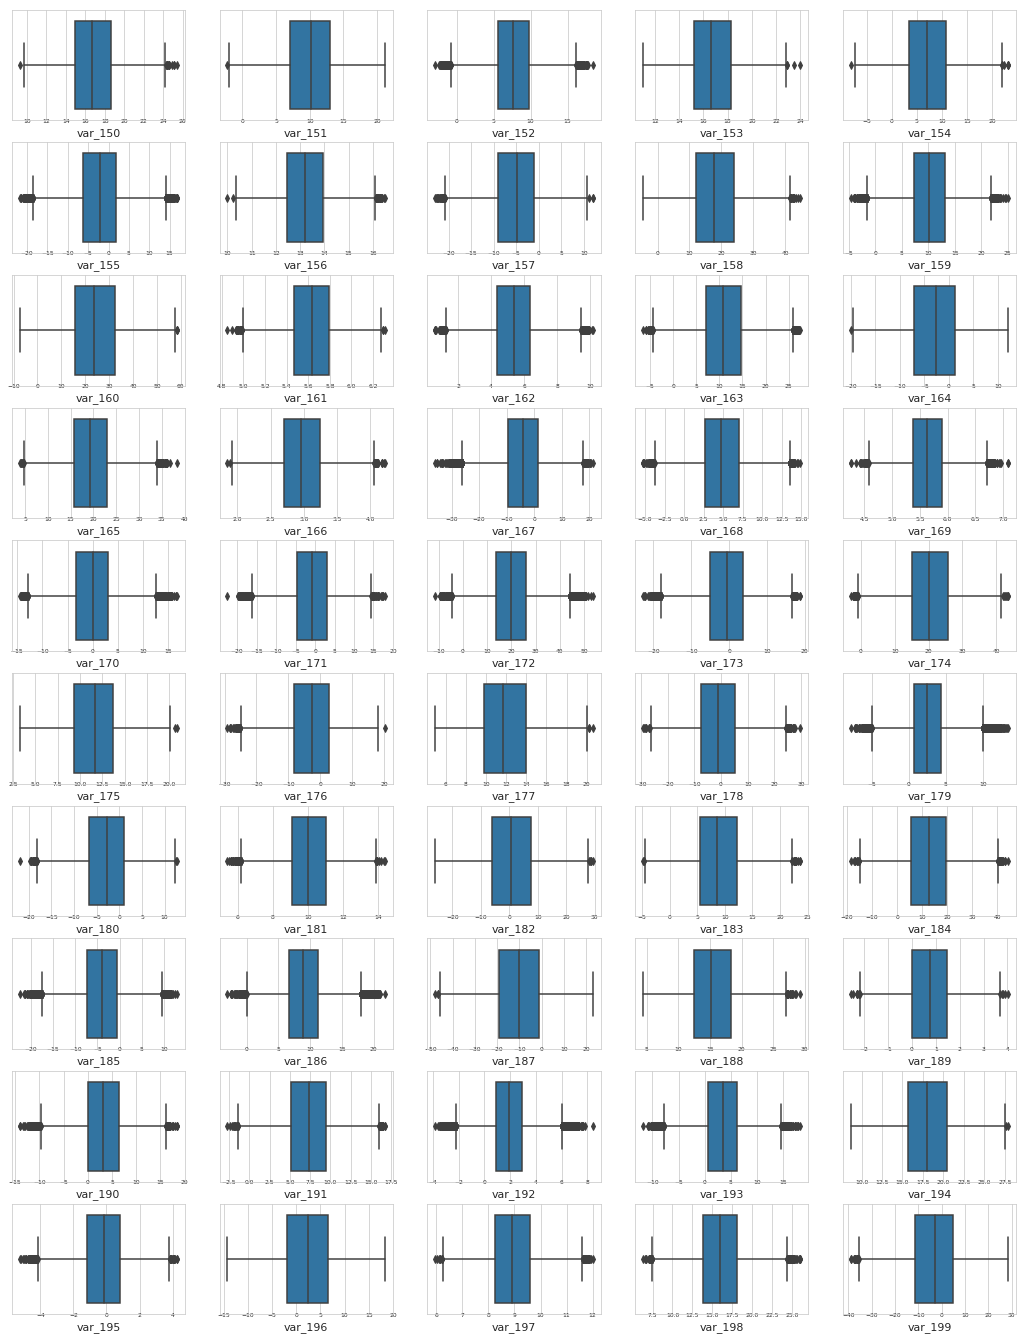

In [0]:
features = train.columns.values[152:202]
plot_feature_boxplot(train, features)
#From var_150 to var_199

In [0]:
# Detect outliers from IQR
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

target      0.000000
var_0       4.304350
var_1       6.098650
var_2       3.794225
var_3       3.070025
var_4       2.377950
var_5      12.125150
var_6       1.235300
var_7       5.159100
var_8       5.255700
var_9       1.965625
var_10      7.977875
var_11      8.363425
var_12      0.270200
var_13      7.201975
var_14      3.488550
var_15      0.611700
var_16      3.603625
var_17      9.665450
var_18     11.835375
var_19     12.156825
var_20      9.251600
var_21     11.538050
var_22      4.110800
var_23      0.769700
var_24      5.866600
var_25      0.407300
var_26      8.231525
var_27      2.323525
var_28      1.101600
             ...    
var_170     6.354900
var_171     7.677150
var_172    12.175950
var_173     8.629425
var_174    10.576625
var_175     4.373900
var_176    11.090900
var_177     4.122625
var_178    12.734450
var_179     3.765550
var_180     7.670100
var_181     1.926600
var_182    13.563600
var_183     6.704325
var_184    13.792850
var_185     6.769350
var_186     4

In [0]:
print("df.shape:",train.shape)
df_in = train[~((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out = train[((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]
print("df_in.shape:",df_in.shape)
print("df_out.shape:",df_out.shape)

df.shape: (200000, 202)
df_in.shape: (157999, 202)
df_out.shape: (42001, 202)


In [0]:
df_out['target'].value_counts()

0    21903
1    20098
Name: target, dtype: int64

In [0]:
#df_out['target'].value_counts()
train['target'].value_counts()
# comparing the 'train' and 'df_out' dataset,
# we can say that all the data points with target equals to 1 are present as outliers

0    179902
1     20098
Name: target, dtype: int64

# **Principal component analysis (PCA)**

- PCA is a dimensionality reduction technique that reduces less-informative 'noise' features. 
- But PCA is sensitive to variance and different scales, so standardizing will help PCA perform better.
- However, since we found that the correlation between different features in the training dataset is not that significant, so using PCA might not be meaningful.

In [0]:
from sklearn.preprocessing import StandardScaler

#scaling training data between -1 to +1
standardized_train = StandardScaler().fit_transform(train.set_index(['ID_code','target']))

In [0]:
standardized_train

array([[-0.57710174, -1.27373702,  0.45170728, ..., -0.37396811,
        -1.02639785,  0.21413482],
       [ 0.26995857, -0.62213756,  1.19036045, ..., -0.12939961,
         0.82541712,  0.50568523],
       [-0.68111341, -0.2760664 ,  0.51698836, ..., -0.69514059,
        -0.38144932,  0.35668144],
       ...,
       [ 0.17870987, -0.84546901, -0.07667568, ..., -0.20904171,
        -0.67680579,  0.72102365],
       [-0.31746727, -1.72398014,  1.09630117, ...,  1.22180338,
        -0.11352617, -1.01298853],
       [ 0.06456676, -1.00810962,  0.53130173, ..., -0.78389704,
        -1.24290845,  0.33196403]])

In [0]:
standardized_train = pd.DataFrame(standardized_train, columns=train.set_index(['ID_code','target']).columns)
standardized_train = train[['ID_code','target']].join(standardized_train)

standardized_train.head(10)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,-0.577102,-1.273737,0.451707,-0.833709,0.235571,-0.536430,-0.334926,0.608751,-1.561580,-1.473796,0.460091,1.076623,-0.054077,-1.714773,0.561098,-0.009778,-1.401636,-0.229802,-1.395940,2.285292,-0.468989,-0.126734,-0.606166,-1.039947,1.005683,-0.823003,-0.184673,0.479492,-0.768964,0.360340,0.926437,1.162587,-1.299824,0.489773,-0.447275,1.300500,-0.484245,0.897088,...,-0.808962,-1.468275,-1.230618,-1.133356,1.749415,-1.323871,-0.711244,0.442890,1.500647,-0.400904,-1.075697,-1.411980,0.122226,0.642079,-0.231051,-1.347890,-0.974846,0.700359,-0.291946,-0.311275,-1.076447,-0.779321,0.261797,1.251424,1.404031,2.086632,0.900016,-0.810464,0.556997,-0.164257,0.263374,-1.149158,0.817469,-0.411013,0.168705,-1.578117,1.022131,-0.373968,-1.026398,0.214135
1,train_1,0,0.269959,-0.622138,1.190360,-0.688846,0.790975,1.539900,0.244461,-0.003525,0.858974,0.419300,-0.144987,1.893408,-0.000409,-0.025160,-0.935586,-2.120000,1.757336,-1.473077,-0.948119,2.017368,-1.678317,-1.771135,1.491237,0.668183,-0.954799,0.782756,-1.302434,-0.932390,-0.621140,-1.722433,-0.202250,-1.165592,0.695096,1.063517,-0.118257,-0.599010,0.196242,-0.011334,...,0.480256,1.078324,-1.086283,0.918394,-0.392137,-0.832228,0.640994,1.727411,-0.339675,0.443627,1.252712,1.102749,0.255461,1.037661,1.408807,-0.395487,-0.590320,1.783707,-0.738204,3.031050,-0.542085,-0.435700,-1.743656,0.146464,1.050349,-0.186013,-0.412563,-0.483543,-0.522151,-1.129387,0.966611,0.093605,0.443623,1.908764,-0.817594,1.522342,1.067654,-0.129400,0.825417,0.505685
2,train_2,0,-0.681113,-0.276066,0.516988,0.536516,-0.305477,-0.511033,1.769839,-0.564749,-1.561370,-1.307408,-0.130752,-1.343197,0.888789,-0.262491,-0.005875,0.179918,-0.647163,0.589523,-1.342815,1.005285,0.759841,0.107340,-1.085317,0.937877,-1.299019,-1.575276,-0.665103,-1.158352,0.399967,0.416687,-0.428711,0.968919,-0.685601,0.987446,-0.718871,0.051395,0.804550,0.473703,...,-1.015814,0.967742,-0.460899,-1.004946,0.335468,0.237541,0.853879,-0.185182,0.766417,0.359986,-1.601890,-0.572671,-1.448003,-0.862364,0.766677,-0.249092,0.331276,-1.156053,-1.012477,-0.067934,-0.294957,-0.506407,-1.560110,-1.254681,1.108568,-0.278666,-1.127290,0.351547,-1.314146,-1.626240,-0.072093,0.777997,-0.174131,-0.412316,1.151591,2.297370,-1.617906,-0.695141,-0.381449,0.356681
3,train_3,0,0.125158,-0.129426,-0.667575,0.195355,0.927992,0.410672,0.500633,-0.474201,-1.843910,0.548767,0.347543,1.014331,-0.934857,0.741492,-0.480762,0.641408,0.551235,0.784619,0.088977,0.160959,1.192958,-0.573410,0.883010,-0.562999,0.410618,0.242366,0.822099,0.152265,0.477453,-0.846035,-0.948135,0.022063,-0.796119,-1.988413,-1.523135,-1.884007,1.918310,-1.340964,...,0.700720,1.537629,1.300009,-1.351618,-1.505430,-0.411123,-1.015017,0.185862,-1.407938,-0.793123,-1.615767,-0.996695,-0.182207,2.076768,-0.765424,-1.223761,1.953266,0.788267,-1.102129,1.109222,-0.192528,-1.220110,0.131590,-0.337210,-1.418782,0.832451,-0.325002,-0.215372,-0.751604,1.129547,0.270216,-0.891456,-0.818468,-0.478548,1.607869,-0.789517,-0.959020,1.501744,0.697118,-0.543502
4,train_4,0,-0.277303,0.035610,0.817683,-0.077829,0.738607,0.955574,0.613372,0.791544,1.794753,0.090006,-1.788863,-1.490109,-0.925386,-0.138103,0.112013,1.171149,-0.330867,0.391612,-1.110346,-0.140479,1.384169,0.207760,2.038227,-0.579511,0.959326,-0.434959,1.220617,-1.446727,0.470432,1.101452,0.568668,-0.428840,0.194985,1.052620,1.793625,-0.619668,0.193903,-

In [0]:
from sklearn.decomposition import PCA
k=80
pca = PCA(n_components=k, random_state=42, whiten=True)
pca.fit(standardized_train.set_index(['ID_code','target']))

PCA(copy=True, iterated_power='auto', n_components=80, random_state=42,
    svd_solver='auto', tol=0.0, whiten=True)

In [0]:
sum(pca.explained_variance_ratio_)

0.4040625557015905

Text(0, 0.5, 'Proportion of variance explained by additional feature')

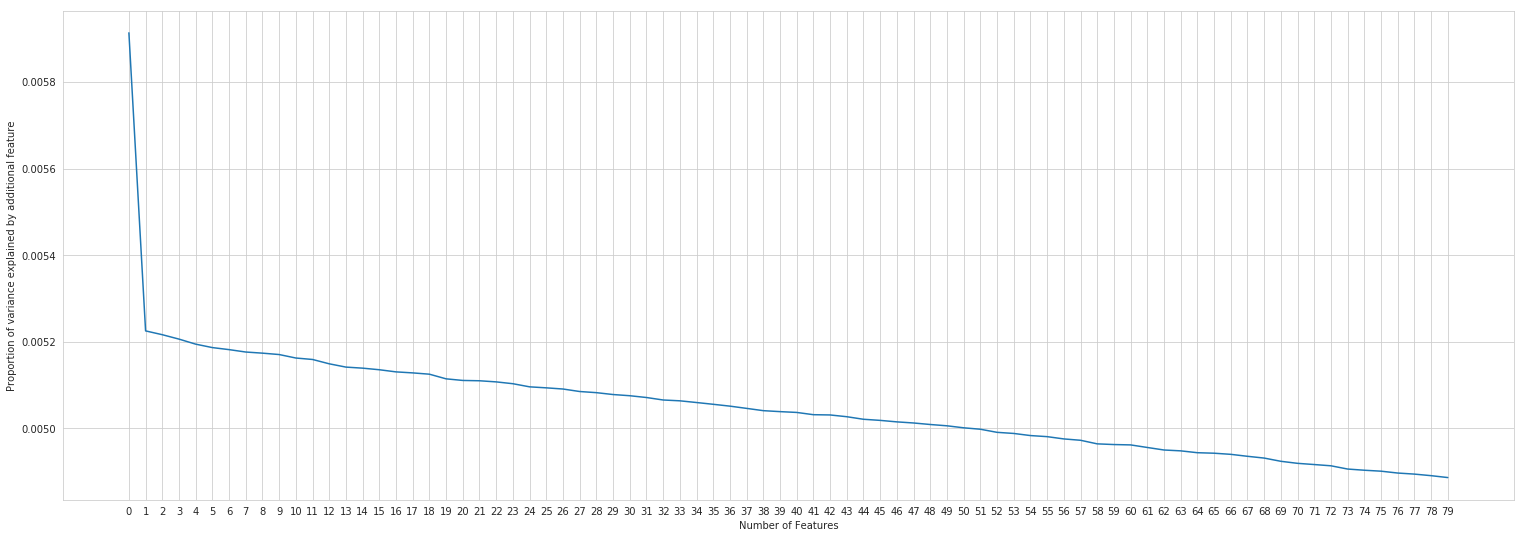

In [0]:
plt.figure(figsize=(26,9))
plt.plot(pca.explained_variance_ratio_)
plt.xticks(range(k))
plt.xlabel("Number of Features")
plt.ylabel("Proportion of variance explained by additional feature")

 Normally, if there is a elbow looking point in the graph above, the x value(number of features) of that point is usually the ideal number of components for PCA.

However in this case, each principal component explains very little of the total variance (e.g. first principal component only explains about 0.6% of the total variance).
Even when we sum up all the variance explained by the 80 principal components, it only amounts to 40%. Let's increase the k and see what happens

In [0]:
sum(PCA(n_components=120, random_state=42, whiten=True).fit(standardized_train.set_index(['ID_code','target'])).\
explained_variance_ratio_)

0.6043175041677914

In [0]:
sum(PCA(n_components=170, random_state=42, whiten=True).fit(standardized_train.set_index(['ID_code','target'])).\
explained_variance_ratio_)

0.857173786247749

- Even with using 170 principal components, 85% of the total variance is explained.
- Hence we proved, that PCA is best when the dimension is very large and a lot of features are correlated to one another a lot.

Hence in our case we can't reduce the dimension of our dataset using PCA.

# **Feature Engineering**

In [0]:
#Created new columns with the unique values count
for Oldvar in ['var_' + str(x) for x in range(200)]:
    train_count_values = train.groupby(Oldvar)[Oldvar].count()
    test_count_values = test.groupby(Oldvar)[Oldvar].count()
    train['new_' + Oldvar] = train_count_values.loc[train[Oldvar]].values
    test['new_' + Oldvar] = test_count_values.loc[test[Oldvar]].values

In [0]:
train.head(3)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,...,new_var_160,new_var_161,new_var_162,new_var_163,new_var_164,new_var_165,new_var_166,new_var_167,new_var_168,new_var_169,new_var_170,new_var_171,new_var_172,new_var_173,new_var_174,new_var_175,new_var_176,new_var_177,new_var_178,new_var_179,new_var_180,new_var_181,new_var_182,new_var_183,new_var_184,new_var_185,new_var_186,new_var_187,new_var_188,new_var_189,new_var_190,new_var_191,new_var_192,new_var_193,new_var_194,new_var_195,new_var_196,new_var_197,new_var_198,new_var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,...,1,21,3,3,1,2,15,1,3,21,5,2,2,1,2,7,3,1,3,4,2,6,1,4,2,1,2,2,2,5,3,6,7,3,4,4,3,13,5,2
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,...,2,27,4,1,1,2,19,1,8,17,1,1,1,1,1,4,1,3,1,1,3,4,1,3,1,2,3,1,5,8,5,4,6,1,1,2,2,13,2,1
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,-0.3249,-11.2648,14.1929,7.3124,7.5244,14.6472,7.6782,-1.7395,4.7011,20.4775,17.7559,18.1377,1.2145,3.5137,5.6777,13.2177,-7.9940,-2.9029,5.8463,6.1439,-11.1025,12.4858,-2.2871,19.0422,11.0449,4.1087,4.6974,6.9346,...,2,20,7,1,3,3,13,2,3,12,1,3,1,3,1,5,2,2,2,5,3,4,2,1,3,3,3,1,1,3,3,4,3,1,2,2,3,8,2,2


In [0]:
test.head(3)

# **Modelling**

In [0]:
Target = train['target']

# Input dataset for Train and Test 
train_inp = train.drop(columns = ['target', 'ID_code'])
test_inp = test.drop(columns = ['ID_code'])

# List of feature names
features = list(train_inp.columns)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_inp, Target, test_size= 0.3, random_state = 2019)

In [13]:
# check the split of train and validation
print('Train:',X_train.shape)
print('Test:',X_test.shape)

Train: (140000, 200)
Test: (60000, 200)


#### Logistic Regression
- We start with most basic algorithm used for classification problems. 
- Since this is an unbalanced dataset, we need to define parameter 'class_weight = balanced' which will give equal weights to both the targets irrespective of their representation in the training dataset. 


In [14]:
#Building Model for Logistic Regression

steps = [('scaler', StandardScaler()),
        ('logreg', LogisticRegression(class_weight='balanced'))]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training set
logreg_scaled = pipeline.fit(X_train,y_train)

y_pred = logreg_scaled.predict_proba(X_test)[:,1]

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
## first make a model function for modeling with confusion matrix
def model(model,features_train,features_test,labels_train,labels_test):
    clf= model
    clf.fit(features_train,labels_train)
    pred=clf.predict(features_test)
    cnf_matrix=confusion_matrix(labels_test,pred)
    print("the recall for this model is :",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
    print("the precision for this model is :",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[0,1]))
    fig= plt.figure(figsize=(10,7))
    print("TP",cnf_matrix[1,1]) # no of true transactions which are predicted as true 
    print("TN",cnf_matrix[0,0]) # no of false transaction which are predicted as false 
    print("FP",cnf_matrix[0,1]) # no of false transactions which are predicted as true
    print("FN",cnf_matrix[1,0]) # no of true transactions which are predicted as false 
    sns.heatmap(cnf_matrix,cmap="Blues",annot=True,fmt="d",linewidths=1,linecolor='black')
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_class")
    plt.ylabel("Real class")
    plt.show()
    print("\n----------Classification Report------------------------------------")
    print(classification_report(labels_test,pred))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


the recall for this model is : 0.7710365349644569
the precision for this model is : 0.2943329546888805
TP 4664
TN 42769
FP 11182
FN 1385


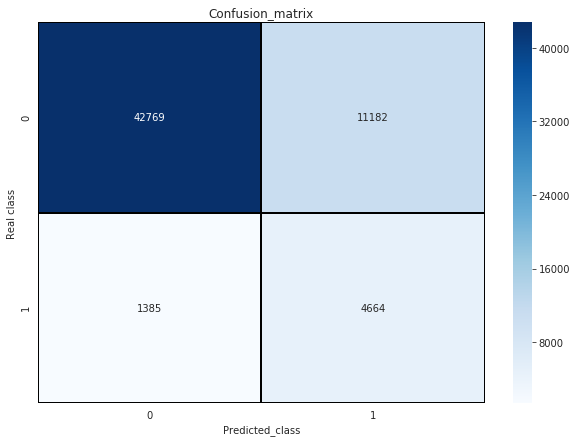


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.79      0.87     53951
           1       0.29      0.77      0.43      6049

    accuracy                           0.79     60000
   macro avg       0.63      0.78      0.65     60000
weighted avg       0.90      0.79      0.83     60000



In [0]:
#Model Excecution for Logistic Regression
model(logreg_scaled,X_train, X_test, y_train, y_test)

In [0]:
#ROC-AUC

def plot_roc_curve(fpr, tpr):  
    fig= plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    print('(ROC) Curve: ROC_AUC={0:0.5f}'.format(roc_auc_score(y_test, y_pred)))
    plt.title('Receiver Operating Characteristic (ROC) Curve: ROC_AUC={0:0.5f}'.format(roc_auc_score(y_test, y_pred)))
    plt.legend()
    plt.show()

In [0]:
#PR-AUC
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

def plot_precision_recall(y_test, y_pred): 
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
# calculate precision-recall AUC
    AUC = auc(recall, precision)
    print('Precision-Recall curve: PR_AUC={0:0.3f}'.format(auc(recall, precision)))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title(' Precision-Recall curve: PR_AUC={0:0.3f}'.format( auc(recall, precision)))
# plot the precision-recall curve for the model
    plt.plot(recall, precision, marker='.')
# show the plot
    plt.show()

Precision-Recall curve: PR_AUC=0.516


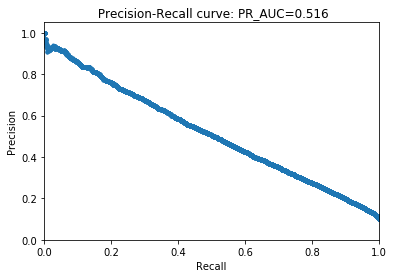

In [0]:
# PR-AUC for Logistic Regression
plot_precision_recall(y_test, y_pred)

(ROC) Curve: ROC_AUC=0.86277


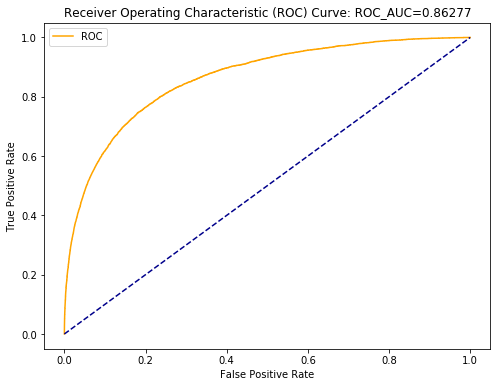

In [0]:
# ROC-AUC for Logistic Regression
y_pred = logreg_scaled.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred) 
plot_roc_curve(fpr, tpr)

In [0]:
#Summary for Logistic Regression

#PR score of 0.516, and ROC_AUC score of 0.86227

### Decision Trees
- Moving on to a slightly advanced algorithm, decision trees. Again, the parameters here are class_weight to deal with unbalanced target variable, random_state for reproducability of same trees. The feature max_features and min_sample_leaf are used to prune the tree and avoid overfitting to the training data.

- Max_features defines what proportion of available input features will be used to create tree.

- Min_sample_leaf restricts the minimum number of samples in a leaf node, making sure none of the leaf nodes has less than 80 samples in it. If leaf nodes have less samples it implies we have grown the tree too much and trying to predict each sample very precisely, thus leading to overfitting.

In [0]:
#Building Model--DT
tree_clf = DecisionTreeClassifier(class_weight='balanced', random_state = 2019, 
                                  max_features = 0.7, min_samples_leaf = 80)

the recall for this model is : 0.5617457430980327
the precision for this model is : 0.15279464004676468
TP 3398
TN 35110
FP 18841
FN 2651


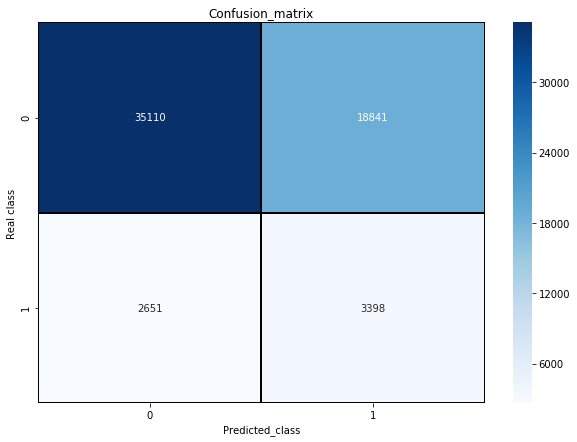


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.65      0.77     53951
           1       0.15      0.56      0.24      6049

    accuracy                           0.64     60000
   macro avg       0.54      0.61      0.50     60000
weighted avg       0.85      0.64      0.71     60000



In [0]:
# Model Execution--DT
model(tree_clf,X_train, X_test, y_train, y_test)

(ROC) Curve: ROC_AUC=0.64563


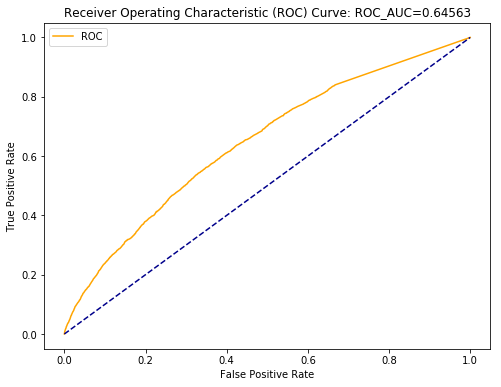

In [0]:
#ROC-AUC for DT

y_pred = tree_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fpr, tpr)

Precision-Recall curve: PR_AUC=0.179


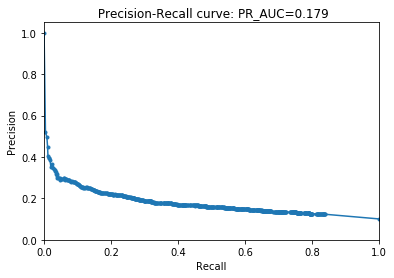

In [0]:
# PR-AUC for DT

plot_precision_recall(y_test, y_pred)

In [0]:
# Extract feature importances--DT

feature_importance_values = tree_clf.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})
feature_importances.sort_values(by='importance', ascending=False).head(n=10)

,feature,importance
81,var_81,0.060000
139,var_139,0.046336
12,var_12,0.038998
146,var_146,0.026827
26,var_26,0.026695
53,var_53,0.024909
110,var_110,0.024318
166,var_166,0.020299
174,var_174,0.018643
109,var_109,0.017605


In [0]:
# SUmmary for DT Model
#PR score of 0.179, and ROC_AUC score of 0.64563

### Ensemble Learning
- Ensemble Learning refers to the algorithms that created using ensembles of variour learning algorithms. For example, random forests are ensembles of many decision tree estimators.


- There are 2 types of ensemble learning algorithms 
    1. Bagging Algorithms: Bagging involves having each model in the ensemble vote with equal weight for the final output. In order to promote model variance, bagging trains each model in the ensemble using a randomly drawn subset of the training set 
    2. Boosting Algorithms: Boosting involves incrementally building an ensemble by training each new model instance to emphasize the training instances that previous models mis-classified.

#### Random Forest
- Let's start with building a random forest, with parameters like class_weight, random_state, and hyperparameters like max_features and min_sample_leaf as earlier. We have also defined the n_estimators which is a compulsory parameter. This defines the number of decision trees that will be present in the forest.

In [0]:
# Create random Forest Object using the mentioned parameters
random_forest = RandomForestClassifier(n_estimators=50, random_state=2019, verbose=1,
                                      class_weight='balanced', max_features = 0.5, 
                                       min_samples_leaf = 50)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 23.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.0s finished


the recall for this model is : 0.35328153413787405
the precision for this model is : 0.3470282559272491
TP 2137
TN 49930
FP 4021
FN 3912


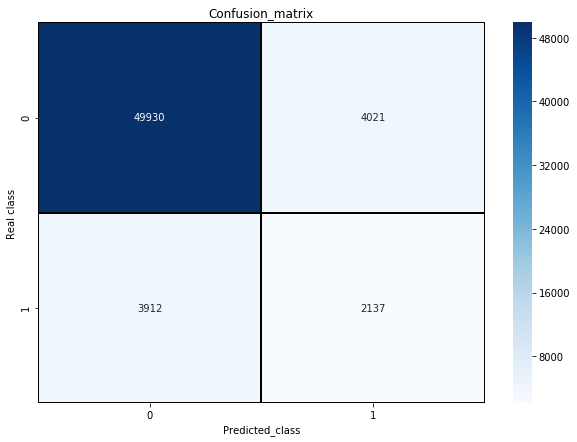


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     53951
           1       0.35      0.35      0.35      6049

    accuracy                           0.87     60000
   macro avg       0.64      0.64      0.64     60000
weighted avg       0.87      0.87      0.87     60000



In [0]:
model(random_forest,X_train, X_test, y_train, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.0s finished


(ROC) Curve: ROC_AUC=0.78519


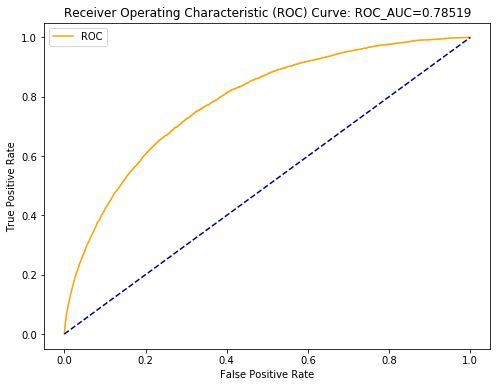

In [0]:
#ROC-AUC for Random Forest

y_pred = random_forest.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fpr, tpr)

Precision-Recall curve: PR_AUC=0.318


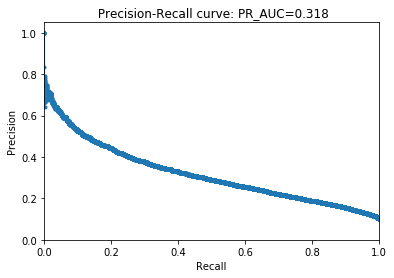

In [0]:
# PR-AUC for Random Forest
plot_precision_recall(y_test, y_pred)

In [0]:
# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})
feature_importances.sort_values(by='importance', ascending=False).head(n=10)

,feature,importance
81,var_81,0.049295
139,var_139,0.039197
12,var_12,0.029136
26,var_26,0.022760
53,var_53,0.022218
110,var_110,0.021640
146,var_146,0.020735
6,var_6,0.017243
174,var_174,0.016083
109,var_109,0.013867


In [0]:
#Summary for Random Forest  
#PR score of 0.318, and ROC_AUC score of 0.78519

### Naive **Bayes**

Naive Bayes is a statistical classification technique based on Bayes Theorem. Naive Bayes classifier is the fast, accurate and reliable algorithm. Naive Bayes classifiers have high accuracy and speed on large datasets.

Naive Bayes classifier assumes that the effect of a particular feature in a class is independent of other features. For example, a loan applicant is desirable or not depending on his/her income, previous loan and transaction history, age, and location. Even if these features are interdependent, these features are still considered independently. This assumption simplifies computation, and that's why it is considered as naive. This assumption is called class conditional independence.

And our dataset also has no correlation or very less ie. negligible correlation So, Naive bayes algo is perfect for our dataset to build Model.

In [0]:
#Building Model Naive Bayes

#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

the recall for this model is : 0.3603901471317573
the precision for this model is : 0.7168694508385399
TP 2180
TN 53090
FP 861
FN 3869


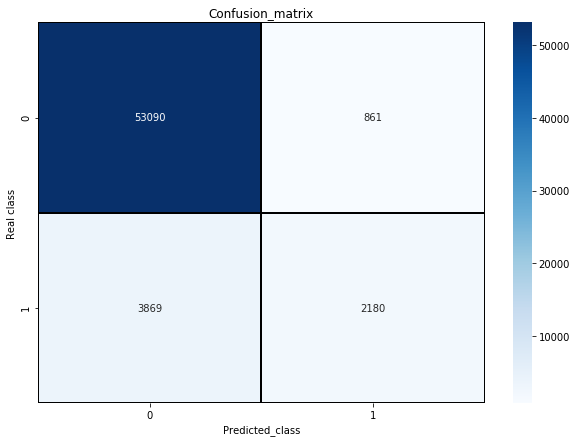


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.98      0.96     53951
           1       0.72      0.36      0.48      6049

    accuracy                           0.92     60000
   macro avg       0.82      0.67      0.72     60000
weighted avg       0.91      0.92      0.91     60000



In [17]:
#Executing Naive Bayes Model
model(gnb,X_train, X_test, y_train, y_test)

[0.03969048 0.43247364 0.31103875 ... 0.08591887 0.27675057 0.00942586]
(ROC) Curve: ROC_AUC=0.88680


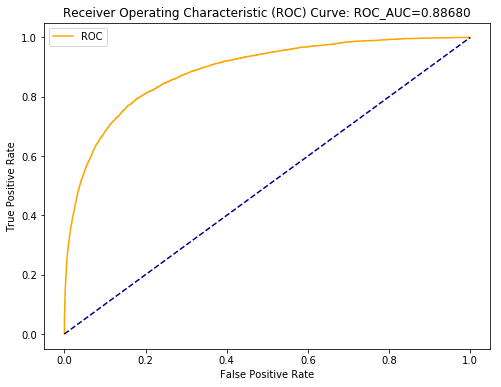

In [18]:
#ROC-AUC for Naive Bayes

y_pred = gnb.predict_proba(X_test)[:,1]
print(y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fpr, tpr)

Precision-Recall curve: PR_AUC=0.584


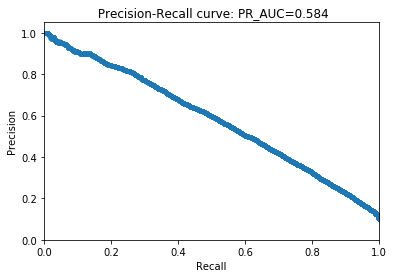

In [19]:
# PR-AUC for DT

plot_precision_recall(y_test, y_pred)

In [0]:
#Summary for Naive Bayes  
#PR score of 0.318, and ROC_AUC score of 0.6588

# **Final Model Selection**

From the above all stats Nave Bayes has highest PR-AUC score ie. 0.584

Hence we are training our model with Nave Bayes and Predicting test dataset using this model.

the recall for this model is : 0.3603901471317573
the precision for this model is : 0.7168694508385399
TP 2180
TN 53090
FP 861
FN 3869


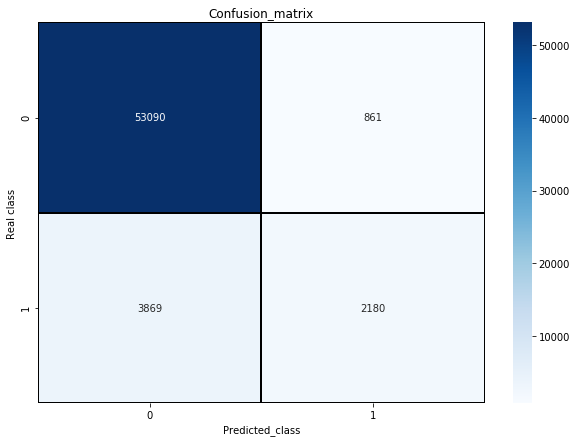


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.98      0.96     53951
           1       0.72      0.36      0.48      6049

    accuracy                           0.92     60000
   macro avg       0.82      0.67      0.72     60000
weighted avg       0.91      0.92      0.91     60000



In [20]:
#Model Excecution for Nave Bayes
gnb = GaussianNB()
model(gnb,X_train, X_test, y_train, y_test)

In [31]:
#predicting test.csv dataset

test_inp = test.drop(columns = ['ID_code'])
predictions = gnb.predict(test_inp)
pred_df = pd.DataFrame(predictions, columns=(['target']))
f_test = test[['ID_code']].join(pred_df)
final_test=f_test.join(test_inp)
print(final_test['target'].value_counts())


final_test.head(15)

0    192248
1      7752
Name: target, dtype: int64


,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,-2.0248,-4.3554,13.9696,0.3458,7.5408,14.5001,7.7028,-19.0919,15.5806,16.1763,3.7088,18.8064,1.5899,3.0654,6.4509,14.1192,-9.4902,-2.1917,5.7107,3.7864,-1.7981,9.2645,2.0657,12.7753,11.3334,8.1462,-0.0610,3.5331,...,5.9232,5.4113,3.8302,5.7380,-8.6105,22.9530,2.5531,-0.2836,4.3416,5.1855,4.2603,1.6779,29.0849,8.4685,18.1317,12.2818,-0.6912,10.2226,-5.5579,2.2926,-4.5358,10.3903,-15.4937,3.9697,31.3521,-1.1651,9.2874,-23.5705,13.2643,1.6591,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,0,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,-1.3809,-0.3310,14.1129,2.5667,5.4988,14.1853,7.0196,4.6564,29.1609,0.0910,12.1469,3.1389,5.2578,2.4228,16.2064,13.5023,-5.2341,-3.6648,5.7080,2.9965,-10.4720,11.4938,-0.9660,15.3445,10.6361,0.8966,6.7428,2.3421,...,30.9641,5.6723,3.6873,13.0429,-10.6572,15.5134,3.2185,9.0535,7.0535,5.3924,-0.7720,-8.1783,29.9227,-5.6274,10.5018,9.6083,-0.4935,8.1696,-4.3605,5.2110,0.4087,12.0030,-10.3812,5.8496,25.1958,-8.8468,11.8263,-8.7112,15.9072,0.9812,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,0,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,8.3442,-4.7057,-3.0422,13.6751,3.8183,10.8535,14.2126,9.8837,2.6541,21.2181,20.8163,12.4666,12.3696,4.7473,2.7936,5.2189,13.5670,-15.4246,-0.1655,7.2633,3.4310,-9.1508,9.7320,3.1062,22.3076,11.9593,9.9255,4.0702,4.9934,...,39.3654,5.5228,3.3159,4.3324,-0.5382,13.3009,3.1243,-4.1731,1.2330,6.1513,-0.0391,1.4950,16.8874,-2.9787,27.4035,15.8819,-10.9660,15.6415,-9.4056,4.4611,-3.0835,8.5549,-2.8517,13.4770,24.4721,-3.4824,4.9178,-2.0720,11.5390,1.1821,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,0,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,7.4578,0.0095,-5.0659,14.0526,13.5010,8.7660,14.7352,10.0383,-15.3508,2.1273,21.4797,14.5372,12.5527,2.9707,4.2398,13.7796,14.1408,1.0061,-1.3479,5.2570,6.5911,6.2161,9.5540,2.3628,10.2124,10.8047,-2.5588,6.0720,3.2613,...,19.7251,5.3882,3.6775,7.4753,-11.0780,24.8712,2.6415,2.2673,7.2788,5.6406,7.2048,3.4504,2.4130,11.1674,14.5499,10.6151,-5.7922,13.9407,7.1078,1.1019,9.4590,9.8243,5.9917,5.1634,8.1154,3.6638,3.3102,-19.7819,13.4499,1.3104,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,0,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,7.1437,5.1025,-3.2827,14.1013,8.9672,4.7276,14.5811,11.8615,3.1480,18.0126,13.8006,1.6026,16.3059,6.7954,3.6015,13.6569,13.8807,8.6228,-2.2654,5.2255,7.0165,-15.6961,10.6239,-4.7674,17.5447,11.8668,3.0154,4.2546,6.7601,...,22.8700,5.6688,6.1159,13.2433,-11.9785,26.2040,3.2348,-5.5775,5.7036,6.1717,-1.6039,-2.4866,17.2728,2.3640,14.0037,12.9165,-12.0311,10.1161,-8.7562,6.0889,-1.3620,10.3559,-7.4915,9.4588,3.9829,5.8580,8.3635,-24.8254,11.4928,1.6321,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846
5,test_5,0,5.9862,-2.2913,8.6058,7.0685,14.2465,-8.6761,4.2467,14.7632,1.8790,7.2842,-4.9194,-9.1869,14.0581,11.4403,4.2950,13.8808,10.9588,-7.0124,15.1829,18.2710,9.7086,22.9103,6.5080,2.3607,1.7899,13.9555,-7.2154,-2.4084,5.1616,6.9291,0.1141,9.7667,1.2339,17.7117,12.3433,-0.1787,-1.2858,5.5220,...,10.4064,5.6731,5.2368,5.2973,-13.2809,26.6861,3.0711,-5.8410,3.2268,5.9344,

In [0]:
# uncomment below code to save file if using google Colab
# writing predicted values to predicted_file.csv 


#from google.colab import files
#final_test.to_csv('predicted_file.csv') 
#files.download('predicted_file.csv')

final_test.to_csv('predicted_file.csv')